In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/Data Mining /UNR-IDD.csv"

In [ ]:
#importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics 


In [ ]:
#Loading data into dataframe

data = pd.read_csv(path)
data.head()

,Switch ID,Port Number,Received Packets,Received Bytes,Sent Bytes,Sent Packets,Port alive Duration (S),Packets Rx Dropped,Packets Tx Dropped,Packets Rx Errors,...,Unknown Load/Latest,Latest bytes counter,is_valid,Table ID,Active Flow Entries,Packets Looked Up,Packets Matched,Max Size,Label,Binary Label
0,of:000000000000000c,Port#:1,132,9181,6311853,238,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
1,of:000000000000000c,Port#:2,187,6304498,15713,171,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
2,of:000000000000000c,Port#:3,235,6311567,8030,58,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
3,of:000000000000000c,Port#:4,59,7878,16439,182,46,0,0,0,...,0,0,True,0,9,767,688,-1,TCP-SYN,Attack
4,of:000000000000000a,Port#:1,188,6304547,16497,183,46,0,0,0,...,0,0,True,0,7,489,403,-1,TCP-SYN,Attack


In [ ]:
#Shape of dataframe

data.shape

(37411, 34)

In [ ]:
#Listing the features of the dataset

data.columns

Index(['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)',
       'Packets Rx Dropped', 'Packets Tx Dropped', 'Packets Rx Errors',
       'Packets Tx Errors', 'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)', 'Delta Packets Rx Dropped',
       ' Delta Packets Tx Dropped', 'Delta Packets Rx Errors',
       'Delta Packets Tx Errors', 'Connection Point', 'Total Load/Rate',
       'Total Load/Latest', 'Unknown Load/Rate', 'Unknown Load/Latest',
       'Latest bytes counter', 'is_valid', 'Table ID', 'Active Flow Entries',
       'Packets Looked Up', 'Packets Matched', 'Max Size', 'Label',
       'Binary Label'],
      dtype='object')

In [ ]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37411 entries, 0 to 37410
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Switch ID                      37411 non-null  object
 1   Port Number                    37411 non-null  object
 2   Received Packets               37411 non-null  int64 
 3   Received Bytes                 37411 non-null  int64 
 4   Sent Bytes                     37411 non-null  int64 
 5   Sent Packets                   37411 non-null  int64 
 6   Port alive Duration (S)        37411 non-null  int64 
 7   Packets Rx Dropped             37411 non-null  int64 
 8   Packets Tx Dropped             37411 non-null  int64 
 9   Packets Rx Errors              37411 non-null  int64 
 10  Packets Tx Errors              37411 non-null  int64 
 11  Delta Received Packets         37411 non-null  int64 
 12  Delta Received Bytes           37411 non-null  int64 
 13  D

In [ ]:
# nunique value in columns

data.nunique()

Switch ID                           12
Port Number                          4
Received Packets                  9931
Received Bytes                   26044
Sent Bytes                       32456
Sent Packets                     11570
Port alive Duration (S)           1206
Packets Rx Dropped                   1
Packets Tx Dropped                   1
Packets Rx Errors                    1
Packets Tx Errors                    1
Delta Received Packets             676
Delta Received Bytes              3635
Delta Sent Bytes                  3476
Delta Sent Packets                 567
Delta Port alive Duration (S)        2
Delta Packets Rx Dropped             1
 Delta Packets Tx Dropped            1
Delta Packets Rx Errors              1
Delta Packets Tx Errors              1
Connection Point                     5
Total Load/Rate                   1297
Total Load/Latest                 1918
Unknown Load/Rate                 1297
Unknown Load/Latest               1918
Latest bytes counter     

In [ ]:
#description of dataset

data.describe().T

,count,mean,std,min,25%,50%,75%,max
Received Packets,37411.0,2.161890e+04,6.528317e+04,9.0,329.0,1170.0,3417.0,352772.0
Received Bytes,37411.0,2.647491e+07,3.703044e+07,786.0,91040.5,12630515.0,37832295.0,271592472.0
Sent Bytes,37411.0,2.451212e+07,3.439876e+07,5705.0,57759.5,12626576.0,31764427.0,239242994.0
Sent Packets,37411.0,3.362682e+04,8.879297e+04,41.0,347.0,1240.0,3968.0,421598.0
Port alive Duration (S),37411.0,9.110964e+02,9.821134e+02,26.0,136.0,259.0,1747.0,3317.0
Packets Rx Dropped,37411.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Packets Tx Dropped,37411.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Packets Rx Errors,37411.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Packets Tx Errors,37411.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.0
Delta Received Packets,37411.0,1.949581e+02,1.087141e+03,0.0,2.0,4.0,6.0,15695.0


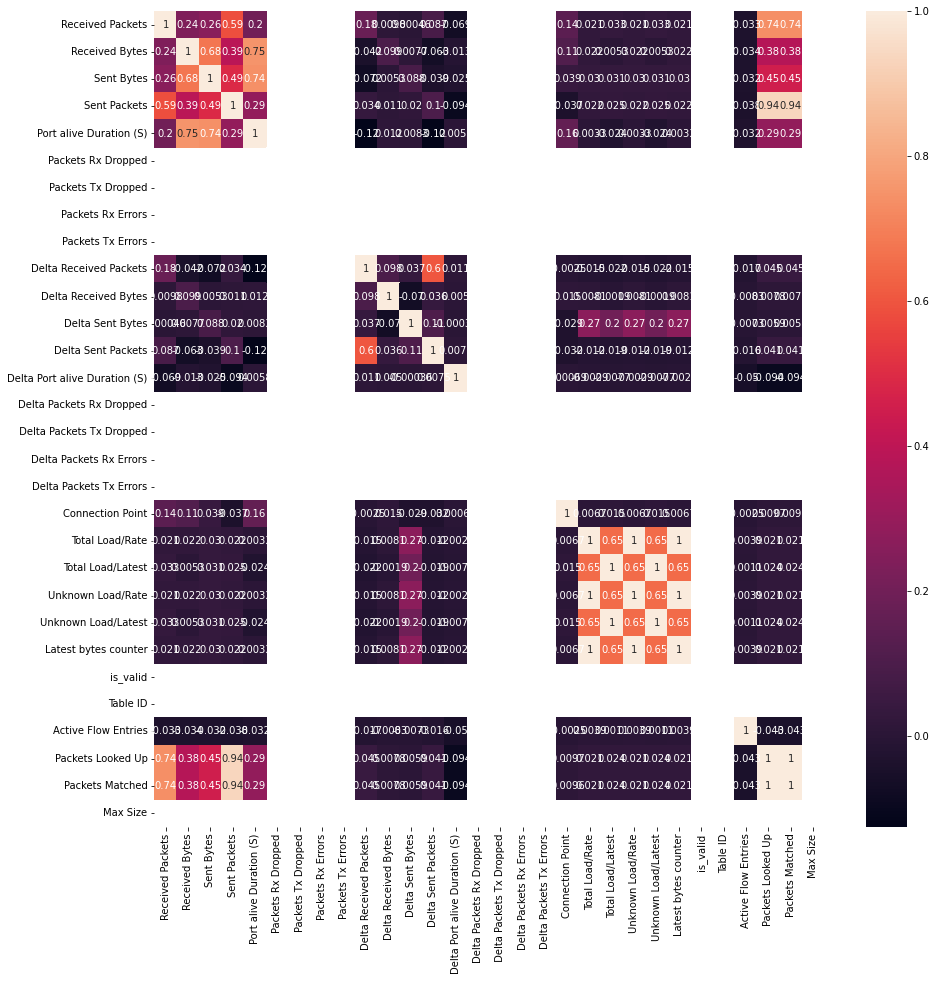

In [ ]:
#Correlation heatmap

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

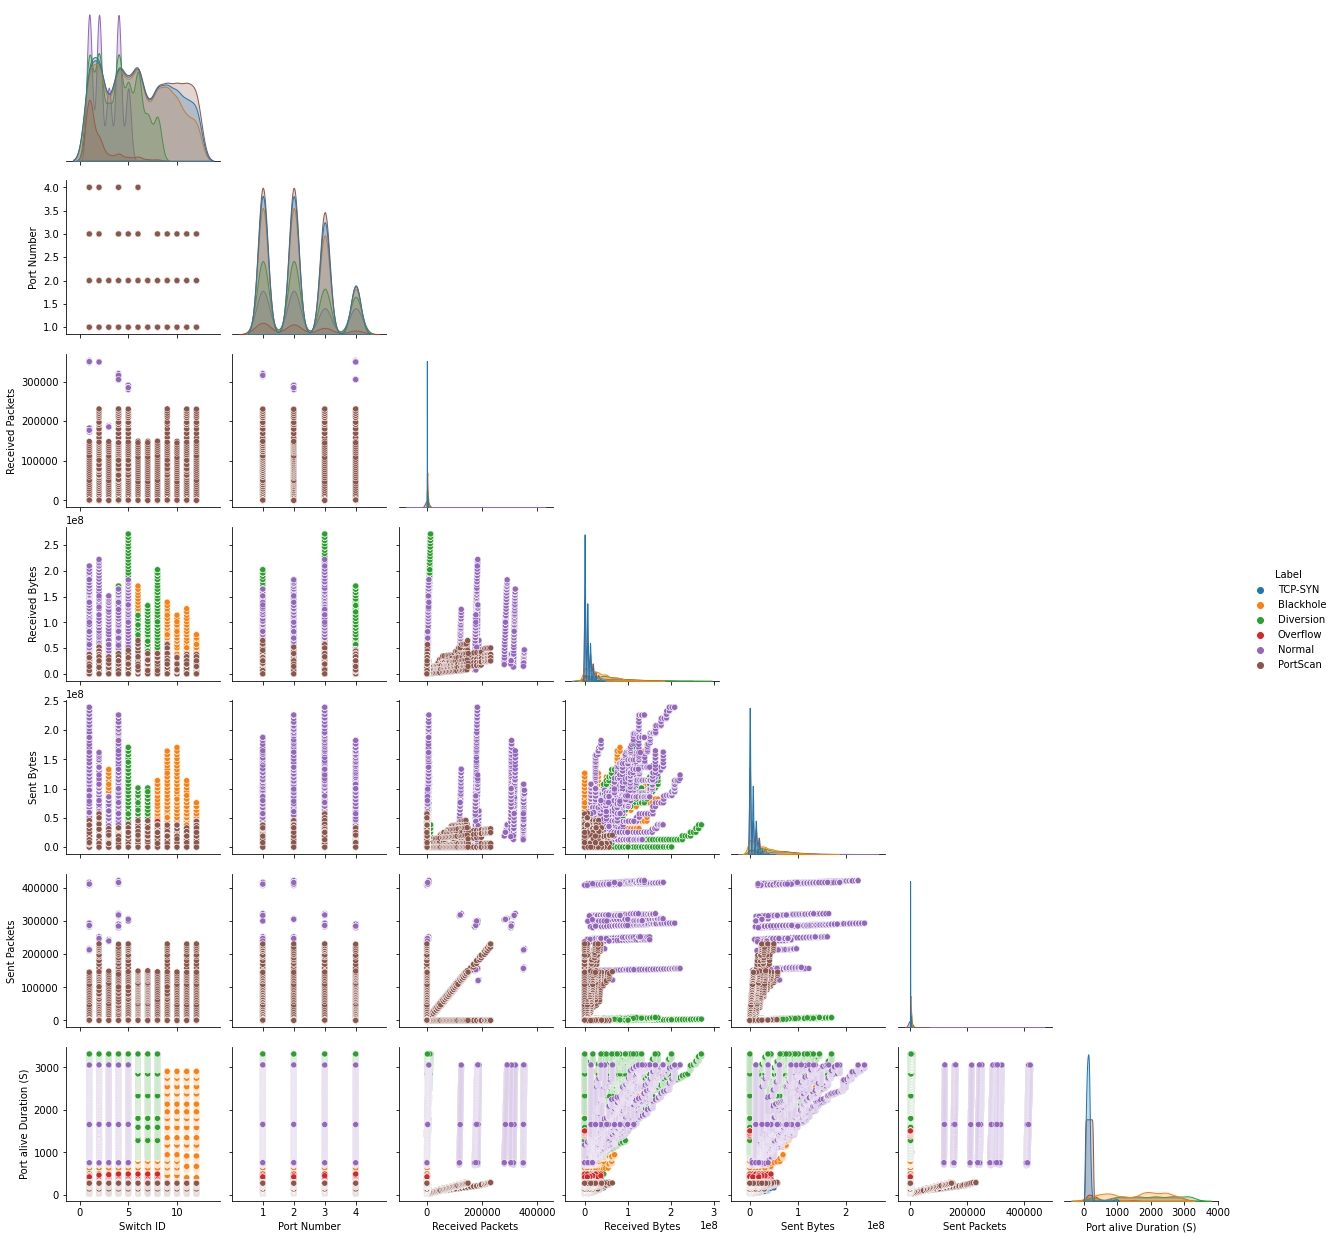

In [ ]:
plt_data = data[['Switch ID', 'Port Number', 'Received Packets', 'Received Bytes',
       'Sent Bytes', 'Sent Packets', 'Port alive Duration (S)','Label']]
fig =sns.pairplot(data = plt_data,hue="Label",corner=True);

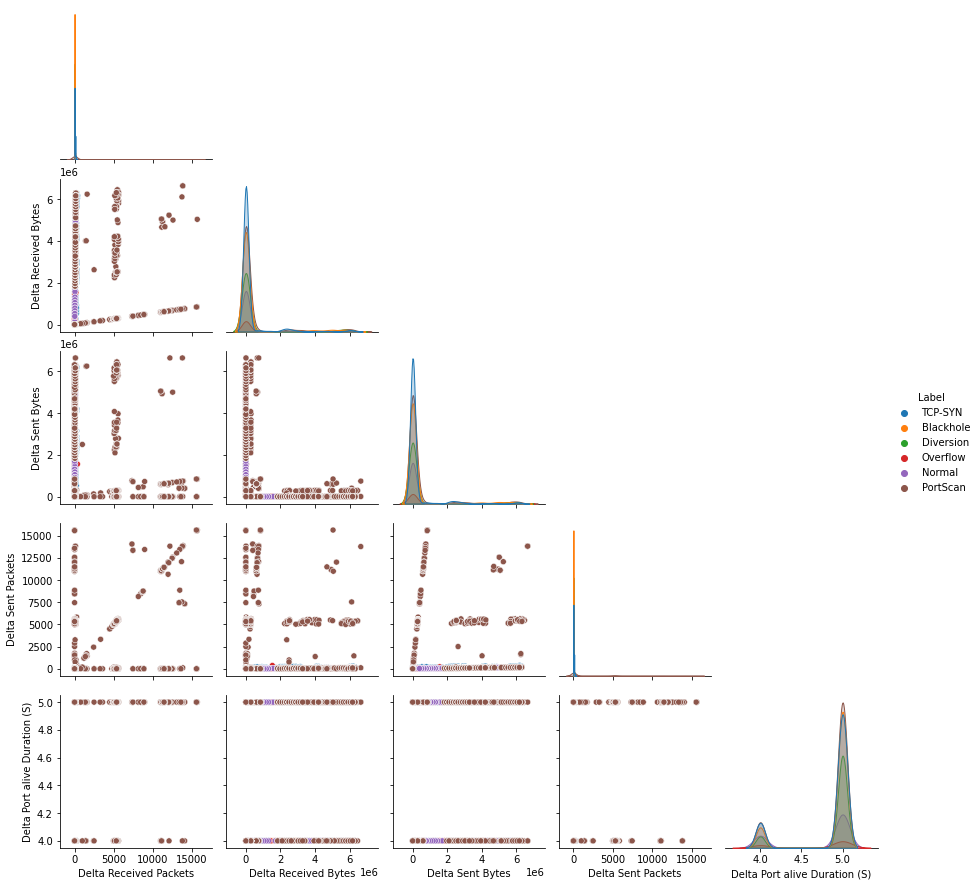

In [ ]:
plt_data = data[[  'Delta Received Packets', 'Delta Received Bytes',
       'Delta Sent Bytes', 'Delta Sent Packets',
       'Delta Port alive Duration (S)','Label']]
fig =sns.pairplot(data = plt_data,hue="Label",corner=True);

In [ ]:
data['Binary Label'].unique()

array(['Attack', 'Normal'], dtype=object)

In [ ]:
data["Binary Label"]=data["Binary Label"].replace(['Attack', 'Normal'], [0,1])

In [ ]:
data["Port Number"]=data["Port Number"].replace(['Port#:1', 'Port#:2', 'Port#:3', 'Port#:4'], [1,2,3,4])

In [ ]:
data["Switch ID"]=data["Switch ID"].replace(['of:000000000000000c', 'of:000000000000000a',
       'of:000000000000000b', 'of:0000000000000003',
       'of:0000000000000004', 'of:0000000000000001',
       'of:0000000000000002', 'of:0000000000000007',
       'of:0000000000000008', 'of:0000000000000005',
       'of:0000000000000006', 'of:0000000000000009'], [1,2,3,4,5,6,7,8,9,10,11,12])

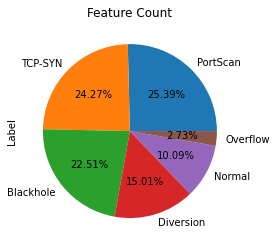

In [ ]:
#  Count in pie chart

data['Label'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.title("Feature Count")
plt.show()

In [ ]:
# Splitting the dataset into dependant and independant fetature

X = data.drop(["Label"],axis =1)
y = data["Label"]

In [ ]:
# Splitting the dataset into train and test sets: 80-20 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26187, 33), (26187,), (11224, 33), (11224,))

In [ ]:
# Creating holders to store the model performance results
ML_Model = []
accuracy = []
f1_score = []
recall = []
precision = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
  ML_Model.append(model)
  accuracy.append(round(a, 3))
  f1_score.append(round(b, 3))
  recall.append(round(c, 3))
  precision.append(round(d, 3))

In [ ]:
# Linear regression model 
from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline

# instantiate the model
log = LogisticRegression()

# fit the model 
log.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#predicting the target value from the model for the samples

y_train_log = log.predict(X_train)
y_test_log = log.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_log = metrics.accuracy_score(y_train,y_train_log)
acc_test_log = metrics.accuracy_score(y_test,y_test_log)
print("Logistic Regression : Accuracy on training Data: {:.3f}".format(acc_train_log))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_log))
print()

f1_score_train_log = metrics.f1_score(y_train,y_train_log,average='micro')
f1_score_test_log = metrics.f1_score(y_test,y_test_log,average='micro')
print("Logistic Regression : f1_score on training Data: {:.3f}".format(f1_score_train_log))
print("Logistic Regression : f1_score on test Data: {:.3f}".format(f1_score_test_log))
print()

recall_score_train_log = metrics.recall_score(y_train,y_train_log,average='micro')
recall_score_test_log = metrics.recall_score(y_test,y_test_log, average='micro')
print("Logistic Regression : Recall on training Data: {:.3f}".format(recall_score_train_log))
print("Logistic Regression : Recall on test Data: {:.3f}".format(recall_score_test_log))
print()

precision_score_train_log = metrics.precision_score(y_train,y_train_log,average='micro')
precision_score_test_log = metrics.precision_score(y_test,y_test_log,average='micro')
print("Logistic Regression : precision on training Data: {:.3f}".format(precision_score_train_log))
print("Logistic Regression : precision on test Data: {:.3f}".format(precision_score_test_log))

Logistic Regression : Accuracy on training Data: 0.338
Logistic Regression : Accuracy on test Data: 0.340

Logistic Regression : f1_score on training Data: 0.338
Logistic Regression : f1_score on test Data: 0.340

Logistic Regression : Recall on training Data: 0.338
Logistic Regression : Recall on test Data: 0.340

Logistic Regression : precision on training Data: 0.338
Logistic Regression : precision on test Data: 0.340


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_log,))

              precision    recall  f1-score   support

   Blackhole       0.26      0.17      0.20      2450
   Diversion       0.29      0.74      0.42      1722
      Normal       0.31      0.85      0.45      1120
    Overflow       0.00      0.00      0.00       317
    PortScan       0.46      0.22      0.29      2813
     TCP-SYN       0.71      0.20      0.32      2802

    accuracy                           0.34     11224
   macro avg       0.34      0.36      0.28     11224
weighted avg       0.42      0.34      0.31     11224



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Logistic Regression',acc_test_log,f1_score_test_log,
             recall_score_train_log,precision_score_train_log)

In [ ]:
# Decision Tree Classifier model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth=30)

# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=30)

In [ ]:
#predicting the target value from the model for the samples

y_train_tree = tree.predict(X_train)
y_test_tree = tree.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_tree = metrics.accuracy_score(y_train,y_train_tree)
acc_test_tree = metrics.accuracy_score(y_test,y_test_tree)
print("Decision Tree : Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree : Accuracy on test Data: {:.3f}".format(acc_test_tree))
print()

f1_score_train_tree = metrics.f1_score(y_train,y_train_tree,average='micro')
f1_score_test_tree = metrics.f1_score(y_test,y_test_tree,average='micro')
print("Decision Tree : f1_score on training Data: {:.3f}".format(f1_score_train_tree))
print("Decision Tree : f1_score on test Data: {:.3f}".format(f1_score_test_tree))
print()

recall_score_train_tree = metrics.recall_score(y_train,y_train_tree,average='micro')
recall_score_test_tree = metrics.recall_score(y_test,y_test_tree,average='micro')
print("Decision Tree : Recall on training Data: {:.3f}".format(recall_score_train_tree))
print("Decision Tree : Recall on test Data: {:.3f}".format(recall_score_test_tree))
print()

precision_score_train_tree = metrics.precision_score(y_train,y_train_tree,average='micro')
precision_score_test_tree = metrics.precision_score(y_test,y_test_tree,average='micro')
print("Decision Tree : precision on training Data: {:.3f}".format(precision_score_train_tree))
print("Decision Tree : precision on test Data: {:.3f}".format(precision_score_test_tree))

Decision Tree : Accuracy on training Data: 1.000
Decision Tree : Accuracy on test Data: 0.933

Decision Tree : f1_score on training Data: 1.000
Decision Tree : f1_score on test Data: 0.933

Decision Tree : Recall on training Data: 1.000
Decision Tree : Recall on test Data: 0.933

Decision Tree : precision on training Data: 1.000
Decision Tree : precision on test Data: 0.933


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

   Blackhole       0.98      0.98      0.98      2450
   Diversion       0.98      0.98      0.98      1722
      Normal       1.00      1.00      1.00      1120
    Overflow       0.79      0.78      0.78       317
    PortScan       0.89      0.90      0.90      2813
     TCP-SYN       0.90      0.88      0.89      2802

    accuracy                           0.93     11224
   macro avg       0.92      0.92      0.92     11224
weighted avg       0.93      0.93      0.93     11224



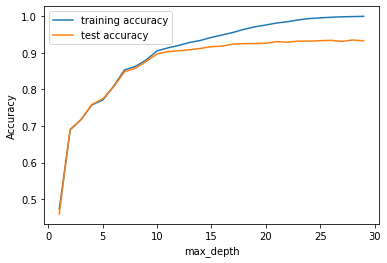

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
depth = range(1,30)
for n in depth:
    tree_test = DecisionTreeClassifier(max_depth=n)

    tree_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(tree_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(tree_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for max_depth from 1 to 30
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("max_depth")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Decision Tree',acc_test_tree,f1_score_test_tree,
             recall_score_train_tree,precision_score_train_tree)

In [ ]:
# Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(n_estimators=10)

# fit the model 
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10)

In [ ]:
#predicting the target value from the model for the samples
y_train_forest = forest.predict(X_train)
y_test_forest = forest.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_forest = metrics.accuracy_score(y_train,y_train_forest)
acc_test_forest = metrics.accuracy_score(y_test,y_test_forest)
print("Random Forest : Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest : Accuracy on test Data: {:.3f}".format(acc_test_forest))
print()

f1_score_train_forest = metrics.f1_score(y_train,y_train_forest,average='micro')
f1_score_test_forest = metrics.f1_score(y_test,y_test_forest,average='micro')
print("Random Forest : f1_score on training Data: {:.3f}".format(f1_score_train_forest))
print("Random Forest : f1_score on test Data: {:.3f}".format(f1_score_test_forest))
print()

recall_score_train_forest = metrics.recall_score(y_train,y_train_forest,average='micro')
recall_score_test_forest = metrics.recall_score(y_test,y_test_forest,average='micro')
print("Random Forest : Recall on training Data: {:.3f}".format(recall_score_train_forest))
print("Random Forest : Recall on test Data: {:.3f}".format(recall_score_test_forest))
print()

precision_score_train_forest = metrics.precision_score(y_train,y_train_forest,average='micro')
precision_score_test_forest = metrics.precision_score(y_test,y_test_tree,average='micro')
print("Random Forest : precision on training Data: {:.3f}".format(precision_score_train_forest))
print("Random Forest : precision on test Data: {:.3f}".format(precision_score_test_forest))

Random Forest : Accuracy on training Data: 0.998
Random Forest : Accuracy on test Data: 0.931

Random Forest : f1_score on training Data: 0.998
Random Forest : f1_score on test Data: 0.931

Random Forest : Recall on training Data: 0.998
Random Forest : Recall on test Data: 0.931

Random Forest : precision on training Data: 0.998
Random Forest : precision on test Data: 0.933


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_forest))

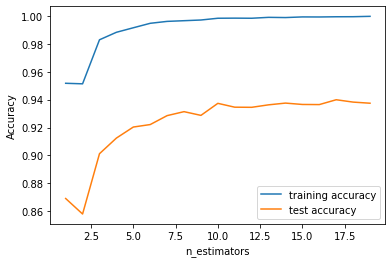

In [ ]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 20
depth = range(1,20)
for n in depth:
    forest_test =  RandomForestClassifier(n_estimators=n)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 20
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("n_estimators")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Random Forest',acc_test_forest,f1_score_test_forest,
             recall_score_train_forest,precision_score_train_forest)

In [ ]:
# Gradient Boosting Classifier Model
from sklearn.ensemble import GradientBoostingClassifier

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
#predicting the target value from the model for the samples
y_train_gbc = gbc.predict(X_train)
y_test_gbc = gbc.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_gbc = metrics.accuracy_score(y_train,y_train_gbc)
acc_test_gbc = metrics.accuracy_score(y_test,y_test_gbc)
print("Gradient Boosting Classifier : Accuracy on training Data: {:.3f}".format(acc_train_gbc))
print("Gradient Boosting Classifier : Accuracy on test Data: {:.3f}".format(acc_test_gbc))
print()

f1_score_train_gbc = metrics.f1_score(y_train,y_train_gbc,average='micro')
f1_score_test_gbc = metrics.f1_score(y_test,y_test_gbc,average='micro')
print("Gradient Boosting Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_gbc))
print("Gradient Boosting Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_gbc))
print()

recall_score_train_gbc = metrics.recall_score(y_train,y_train_gbc,average='micro')
recall_score_test_gbc =  metrics.recall_score(y_test,y_test_gbc,average='micro')
print("Gradient Boosting Classifier : Recall on training Data: {:.3f}".format(recall_score_train_gbc))
print("Gradient Boosting Classifier : Recall on test Data: {:.3f}".format(recall_score_test_gbc))
print()

precision_score_train_gbc = metrics.precision_score(y_train,y_train_gbc,average='micro')
precision_score_test_gbc = metrics.precision_score(y_test,y_test_gbc,average='micro')
print("Gradient Boosting Classifier : precision on training Data: {:.3f}".format(precision_score_train_gbc))
print("Gradient Boosting Classifier : precision on test Data: {:.3f}".format(precision_score_test_gbc))

Gradient Boosting Classifier : Accuracy on training Data: 0.998
Gradient Boosting Classifier : Accuracy on test Data: 0.963

Gradient Boosting Classifier : f1_score on training Data: 0.998
Gradient Boosting Classifier : f1_score on test Data: 0.963

Gradient Boosting Classifier : Recall on training Data: 0.998
Gradient Boosting Classifier : Recall on test Data: 0.963

Gradient Boosting Classifier : precision on training Data: 0.998
Gradient Boosting Classifier : precision on test Data: 0.963


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_gbc))

              precision    recall  f1-score   support

   Blackhole       0.99      0.99      0.99      2450
   Diversion       1.00      1.00      1.00      1722
      Normal       1.00      1.00      1.00      1120
    Overflow       0.99      0.89      0.94       317
    PortScan       0.93      0.94      0.94      2813
     TCP-SYN       0.93      0.93      0.93      2802

    accuracy                           0.96     11224
   macro avg       0.97      0.96      0.97     11224
weighted avg       0.96      0.96      0.96     11224



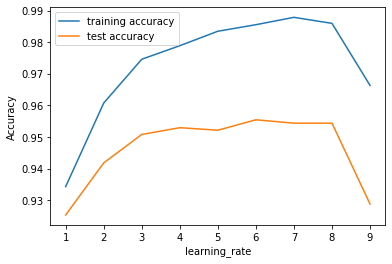

In [ ]:
training_accuracy = []
test_accuracy = []
# try learning_rate from 0.1 to 0.9
depth = range(1,10)
for n in depth:
    forest_test =  GradientBoostingClassifier(learning_rate = n*0.1)

    forest_test.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(forest_test.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(forest_test.score(X_test, y_test))
    

#plotting the training & testing accuracy for n_estimators from 1 to 50
plt.figure(figsize=None)
plt.plot(depth, training_accuracy, label="training accuracy")
plt.plot(depth, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")  
plt.xlabel("learning_rate")
plt.legend();

In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Gradient Boosting Classifier',acc_test_gbc,f1_score_test_gbc,
             recall_score_train_gbc,precision_score_train_gbc)

In [ ]:
# Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# instantiate the model
nb=  GaussianNB()

# fit the model 
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
#predicting the target value from the model for the samples
y_train_nb = nb.predict(X_train)
y_test_nb = nb.predict(X_test)

In [ ]:
#computing the accuracy, f1_score, Recall, precision of the model performance

acc_train_nb = metrics.accuracy_score(y_train,y_train_nb)
acc_test_nb = metrics.accuracy_score(y_test,y_test_nb)
print("Naive Bayes Classifier : Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes Classifier : Accuracy on test Data: {:.3f}".format(acc_test_nb))
print()

f1_score_train_nb = metrics.f1_score(y_train,y_train_nb,average='micro')
f1_score_test_nb = metrics.f1_score(y_test,y_test_nb,average='micro')
print("Naive Bayes Classifier : f1_score on training Data: {:.3f}".format(f1_score_train_nb))
print("Naive Bayes Classifier : f1_score on test Data: {:.3f}".format(f1_score_test_nb))
print()

recall_score_train_nb = metrics.recall_score(y_train,y_train_nb,average='micro')
recall_score_test_nb = metrics.recall_score(y_test,y_test_nb,average='micro')
print("Naive Bayes Classifier : Recall on training Data: {:.3f}".format(recall_score_train_nb))
print("Naive Bayes Classifier : Recall on test Data: {:.3f}".format(recall_score_test_nb))
print()

precision_score_train_nb = metrics.precision_score(y_train,y_train_nb,average='micro')
precision_score_test_nb = metrics.precision_score(y_test,y_test_nb,average='micro')
print("Naive Bayes Classifier : precision on training Data: {:.3f}".format(precision_score_train_nb))
print("Naive Bayes Classifier : precision on test Data: {:.3f}".format(precision_score_test_nb))

Naive Bayes Classifier : Accuracy on training Data: 0.631
Naive Bayes Classifier : Accuracy on test Data: 0.633

Naive Bayes Classifier : f1_score on training Data: 0.631
Naive Bayes Classifier : f1_score on test Data: 0.633

Naive Bayes Classifier : Recall on training Data: 0.631
Naive Bayes Classifier : Recall on test Data: 0.633

Naive Bayes Classifier : precision on training Data: 0.631
Naive Bayes Classifier : precision on test Data: 0.633


In [ ]:
#computing the classification report of the model

print(metrics.classification_report(y_test, y_test_nb))

              precision    recall  f1-score   support

   Blackhole       0.53      0.43      0.47      2450
   Diversion       0.55      0.49      0.52      1722
      Normal       0.96      1.00      0.98      1120
    Overflow       0.32      0.25      0.28       317
    PortScan       1.00      0.51      0.67      2813
     TCP-SYN       0.53      0.92      0.67      2802

    accuracy                           0.63     11224
   macro avg       0.65      0.60      0.60     11224
weighted avg       0.69      0.63      0.63     11224



In [ ]:
#storing the results. The below mentioned order of parameter passing is important.

storeResults('Naive Bayes Classifier',acc_test_nb,f1_score_test_nb,
             recall_score_train_nb,precision_score_train_nb)

In [ ]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'f1_score' : f1_score,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

In [ ]:
#Sorting the datafram on accuracy
top_result=result.sort_values(by=['Accuracy', 'f1_score'],ascending=False).reset_index(drop=True)

In [ ]:
# dispalying total result
top_result

,ML Model,Accuracy,f1_score,Recall,Precision
0,Gradient Boosting Classifier,0.963,0.963,0.998,0.998
1,Decision Tree,0.933,0.933,1.000,1.000
2,Random Forest,0.931,0.931,0.998,0.998
3,Naive Bayes Classifier,0.633,0.633,0.631,0.631
4,Logistic Regression,0.340,0.340,0.338,0.338


In [ ]:
#Best Model is Gradient Boosting Classifier 

# instantiate the model
gbc = GradientBoostingClassifier(max_depth=4,learning_rate=0.7)

# fit the model 
gbc.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.7, max_depth=4)

In [ ]:
#creating a model file for pipeline 
import pickle

# dump information to that file
pickle.dump(gbc, open('model.pkl', 'wb'))

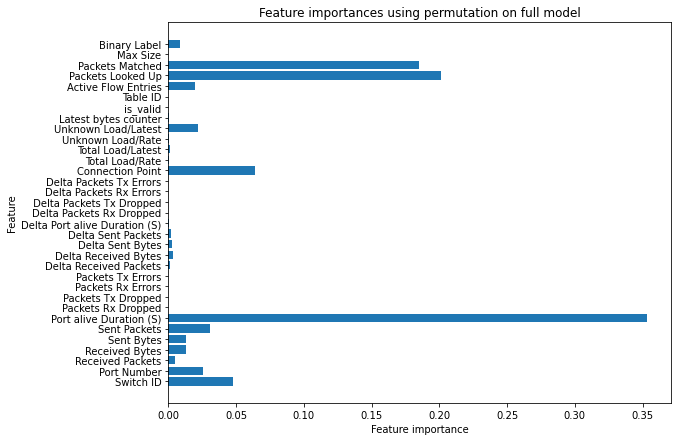

In [ ]:
#Feature Storing 
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.title("Feature importances using permutation on full model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()